In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import psycopg2

In [109]:
# Data Frame (загрузка CSV файла с данными разделенными запятой)
# Загрузка файла из Git репозитория в Pandas
dataset = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/certification1/dataset_tk.csv', sep=',')
# sns.load_dataset('titanic')

# Просмотр типов данных в датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [110]:
# Просмотр наименования колонок
# Дата
# Потребление электроэнергии в гигаваттах по городам
print(dataset.columns) # list с заголовками
print(" ".join(dataset.columns))

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')
Unnamed: 0 Punjab Haryana Rajasthan Delhi UP Uttarakhand HP J&K Chandigarh Chhattisgarh Gujarat MP Maharashtra Goa DNH Andhra Pradesh Telangana Karnataka Kerala Tamil Nadu Pondy Bihar Jharkhand Odisha West Bengal Sikkim Arunachal Pradesh Assam Manipur Meghalaya Mizoram Nagaland Tripura


In [111]:
# Первые ячейки
dataset.head(10)

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
5,07/01/2019 00:00:00,118.0,132.1,241.9,71.1,294.2,40.1,30.1,53.3,4.0,...,64.0,109.3,1.5,2.2,21.4,2.5,6.1,1.8,2.3,3.3
6,08/01/2019 00:00:00,107.5,121.4,237.2,69.0,289.4,37.0,29.2,51.2,3.8,...,63.6,102.9,1.6,2.3,20.7,2.6,6.2,1.8,2.1,3.3
7,09/01/2019 00:00:00,132.5,148.2,197.0,89.2,258.6,35.9,25.3,37.9,3.9,...,86.6,131.7,1.1,2.1,25.8,2.3,6.0,1.7,2.4,4.2
8,10/01/2019 00:00:00,131.5,157.0,199.9,92.8,284.2,35.3,26.5,31.7,3.9,...,78.8,140.1,1.1,2.1,25.8,2.4,6.2,1.7,2.1,4.3
9,11/01/2019 00:00:00,130.3,145.3,187.7,79.5,281.4,30.1,23.9,37.3,3.4,...,78.4,149.8,0.8,2.1,27.9,2.4,6.2,1.8,2.1,4.3


In [112]:
# Последние ячейки
dataset.tail(10)

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
493,01/11/2020 00:00:00,284.4,205.8,220.9,126.4,403.0,45.1,29.9,41.9,6.5,...,81.0,177.9,1.2,2.2,34.0,2.6,5.8,2.0,2.2,5.6
494,02/11/2020 00:00:00,271.4,210.4,218.1,122.3,364.9,44.2,29.9,41.0,6.0,...,79.7,161.8,1.0,2.1,30.9,2.3,5.6,1.7,2.0,5.2
495,03/11/2020 00:00:00,270.0,199.5,201.3,119.6,377.9,42.2,25.0,43.0,5.6,...,80.6,144.9,0.8,2.2,26.8,2.4,5.9,1.4,2.1,4.3
496,04/11/2020 00:00:00,124.3,117.9,213.8,72.0,311.1,34.1,24.9,44.5,3.3,...,81.3,145.8,1.1,2.0,18.0,2.3,4.9,1.5,1.9,2.6
497,05/11/2020 00:00:00,124.4,124.0,216.6,75.0,320.1,35.6,24.7,45.4,3.5,...,95.3,168.7,1.3,2.0,19.8,2.1,5.3,1.7,1.9,2.4
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3
502,05/12/2020 00:00:00,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3


In [113]:
# Сумма нулевых значений по столбцам (проверяем датасет на наличие пропусков).
dataset.isnull().sum()

Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [114]:
# Количество неопределенные значений (неправильно считанные)
dataset.isna().sum()

Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [115]:
# Параметры числовых значений (фильтрация по числовым)
# С округлением до 2-х знаков после запятой
dataset.describe(include=['float', 'int']).round(2)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,...,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00
mean,141.15,138.33,218.44,83.38,314.04,36.16,26.57,44.26,4.14,83.88,...,80.46,138.71,1.29,2.11,24.96,2.49,5.64,1.71,2.16,4.09
std,56.98,38.11,27.42,25.92,66.52,6.71,4.81,4.77,1.14,10.13,...,10.91,27.85,0.36,0.23,4.73,0.22,0.72,0.14,0.15,0.75
min,56.10,64.80,105.80,41.80,186.80,16.80,11.80,17.80,2.20,37.20,...,51.10,51.50,0.30,1.10,12.20,1.50,3.30,1.20,1.40,1.40
25%,104.00,114.80,205.80,63.50,263.65,33.80,25.60,41.55,3.30,75.70,...,71.65,114.65,1.10,2.00,22.10,2.40,5.30,1.60,2.10,3.50
50%,118.30,126.80,222.90,72.70,290.00,37.00,28.00,44.10,3.80,82.60,...,79.80,131.20,1.20,2.20,23.50,2.50,5.80,1.70,2.20,3.90
75%,162.50,158.10,237.60,105.80,370.55,40.35,29.70,47.35,4.90,91.60,...,88.40,164.75,1.40,2.20,27.60,2.60,6.10,1.80,2.20,4.60
max,300.00,237.20,278.00,147.10,471.80,53.20,34.00,54.20,7.40,111.60,...,113.00,198.50,2.80,2.70,38.00,3.20,6.90,2.20,2.70,6.60


In [116]:
# Объем памяти DataFrame
memory = dataset.memory_usage(deep=True).sum()
print(f'Объем памяти, занимаемый DataFrame: {memory} байт')

Объем памяти, занимаемый DataFrame: 171152 байт


In [117]:
# Кортеж из количества строк и столбцов
dtype = dataset.dtypes.value_counts()
print(f'Всего столбцов разных типов - {len(dtype)}')

Всего столбцов разных типов - 2


In [118]:
# Кортеж из количества строк и столбцов
count = dataset.shape
print(f'Количество строк - {count[0]}, количество столбцов - {count[1]}')

Количество строк - 503, количество столбцов - 34


In [119]:
# Удаление строк с пустыми занчениями
# Нет необходимости
# dataset = dataset.dropna()
# dataset

In [120]:
# Уникальные значения столбцов
nunique = dataset.nunique()
nunique

Unnamed: 0           498
Punjab               394
Haryana              388
Rajasthan            379
Delhi                337
UP                   444
Uttarakhand          203
HP                   138
J&K                  172
Chandigarh            48
Chhattisgarh         272
Gujarat              403
MP                   407
Maharashtra          422
Goa                   69
DNH                   82
Andhra Pradesh       318
Telangana            387
Karnataka            393
Kerala               231
Tamil Nadu           411
Pondy                 56
Bihar                297
Jharkhand             94
Odisha               283
West Bengal          365
Sikkim                22
Arunachal Pradesh     17
Assam                168
Manipur               16
Meghalaya             36
Mizoram               11
Nagaland              12
Tripura               38
dtype: int64

In [121]:
# Максимальные значения столбцов
maxi = dataset.max()
maxi

Unnamed: 0           31/12/2019 00:00:00
Punjab                             300.0
Haryana                            237.2
Rajasthan                          278.0
Delhi                              147.1
UP                                 471.8
Uttarakhand                         53.2
HP                                  34.0
J&K                                 54.2
Chandigarh                           7.4
Chhattisgarh                       111.6
Gujarat                            400.8
MP                                 272.3
Maharashtra                        522.1
Goa                                 14.0
DNH                                 19.5
Andhra Pradesh                     205.1
Telangana                          256.2
Karnataka                          273.3
Kerala                              89.4
Tamil Nadu                         365.4
Pondy                                9.7
Bihar                              121.4
Jharkhand                           28.9
Odisha          

In [122]:
# Максимальные значения столбцов
mini = dataset.min()
mini

Unnamed: 0           01/01/2020 00:00:00
Punjab                              56.1
Haryana                             64.8
Rajasthan                          105.8
Delhi                               41.8
UP                                 186.8
Uttarakhand                         16.8
HP                                  11.8
J&K                                 17.8
Chandigarh                           2.2
Chhattisgarh                        37.2
Gujarat                            192.3
MP                                 131.8
Maharashtra                        305.6
Goa                                  6.2
DNH                                  1.3
Andhra Pradesh                     130.6
Telangana                          130.5
Karnataka                          121.0
Kerala                              55.0
Tamil Nadu                         195.7
Pondy                                4.0
Bihar                               43.5
Jharkhand                           17.4
Odisha          

In [123]:
# Конвертация первого столбца даты в dtype: datetime64[ns]
dataset['Unnamed: 0'] = pd.to_datetime(dataset['Unnamed: 0'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
# dataset['Unnamed: 0'] = dataset['Unnamed: 0'].astype('datetime64[ns]')
dataset['Unnamed: 0']

0     2019-02-01
1     2019-03-01
2     2019-04-01
3     2019-05-01
4     2019-06-01
         ...    
498   2020-01-12
499   2020-02-12
500   2020-03-12
501   2020-04-12
502   2020-05-12
Name: Unnamed: 0, Length: 503, dtype: datetime64[ns]

<Axes: >

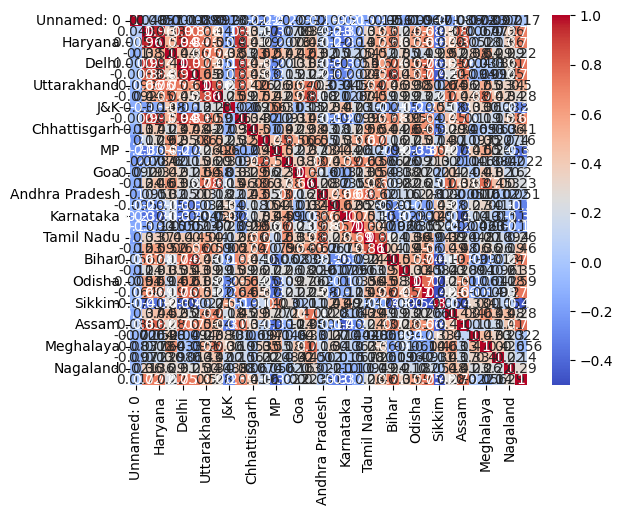

In [124]:
# Потстроим матрицу корреляций.
matrix_corr = dataset.corr()

# Вывод корреляционной матрицы.
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')